# Comprehensiveness

In [2]:
# preprocess the concepts
# Defining pre-processing function

from nltk.stem import WordNetLemmatizer 
def preprocessEntity (text):
    processed1 = lowercase (text)
    processed2 = lemmatization(processed1)
    normalized = normalizeCOVID (processed2)
    return normalized

def lowercase (text):
    lowercased = text.lower()
    return lowercased

def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = ' '.join([lemmatizer.lemmatize(w) for w in text.split()])
    return lemmatized

def normalizeCOVID (text):
    covid_variants1 = ['coronarivus disease','sarsr-cov','2019ncov', '2019 ncov','severe acute respiratory syndrome-related coronavirus 2', 'sars-cov2', 'wuhan virus','covid-19 (covid-19)', 'covid19 coronavirus',  'coronarivus', 'sars-cov-2', '2019-ncov', 'covid 19', 'covid19', 'wuhan coronavirus', 'chinese coronavirus', 'covidー19', 'novel coronavirus']
    covid_variants2 = ['corona','sars-cov']
    for variant in covid_variants1:
        if variant in text:
            text = text.replace(variant, 'covid-19')
            
    if (('corona' in text) and ('coronavirus' not in text)):
            text = text.replace('corona', 'covid-19')
            
    if (('sars-cov' in text) and ('sars-cov-2' not in text)):
            text = text.replace('corona', 'covid-19')
    return text
        
    
preprocessEntity ('normalized bananas coronarivus disease coronarivus disease sars-cov-2')  

'normalized banana covid-19 covid-19 covid-19'

In [3]:
import pandas as pd
paths=[r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\comprehensiveness\all.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\comprehensiveness\COVID-19.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\comprehensiveness\SARS-CoV-2.csv"]

all_entities = []
for path in paths: 
    with open(path, 'r', encoding = 'utf-8' ) as f:
        data = pd.read_csv(f)
    data = data.fillna('')
    data = data.applymap(preprocessEntity)
    data = data.apply(lambda x: x.replace(x,'covid-19 outbreak') if 'outbreak' in x else x)
    if len(data.columns) <2:
        data ['head'] = data['head'].apply(lambda x: x.replace(x,'covid-19 outbreak') if 'outbreak' in x else x)
        data ['head'] = data['head'].apply(lambda x: x.replace(x,'covid-19') if 'wuhan' in x else x)
        all_entities.extend( data['head'].values.tolist())
        #print('1111-----', len(all_entities))
    else:
        for col in data.columns:
            data [col] = data[col].apply(lambda x: x.replace(x,'covid-19') if 'wuhan' in x else x)
            #print('2222---------', len(data[col].values.tolist()))          
            all_entities.extend(data[col].values.tolist())
        
covid_variants = ['covid2019', 'covid-2019', 'covid', 'coronavirus disease 2019','covid-19 acute respiratory disease',
                  'covid-19 virus', 'covid-19', '2019 covid-19 respiratory syndrome','acute respiratory syndrome coronavirus 2', 'covid-19 (covid-19)']

pandemic_variants = ['2019–2021 coronavirus pandemic', 'covid-19 pandemic','the great disaster of 2020']
final = set([item for item in all_entities if type(item) is str ])
final = [i for i in final if len(i) >1]
final = [i.replace('[covid-19]', '') for i in final]
print('all scrapped concepts from Wikidata: ', len(final))
final

all scrapped concepts from Wikidata:  140


['calu-3',
 'baricitinib',
 'contact transmission',
 'nasal congestion',
 'symptomatic treatment',
 'brain damage',
 '2019–21 coronavirus pandemic',
 'ncovd-19',
 'covid-19 acute respiratory disease',
 'respiratory failure',
 'zhang jixian',
 'myalgia',
 'coronavirus pandemic',
 'nucleocapsid protein ',
 'influenza like illness',
 'covid-19 mortality',
 'caco-2',
 '(s)-(−)-colchicine',
 'covid-19 genome',
 'coronavirus disease',
 'severe acute respiratory syndrome coronavirus 2',
 'obesity',
 'envelope protein ',
 'diarrhea',
 'pediatric multisystem inflammatory syndrome',
 'severe acute respiratory syndrome coronavirus clade 2',
 'droplet infection',
 'delirium',
 'seafood market pneumonia',
 'lymphopenia',
 'spike glycoprotein ',
 'coronavirus',
 'covid pandemic',
 'veroe6/tmprss2',
 'chronic obstructive pulmonary disease',
 'ncovd 19',
 'coronavirus covid-19',
 'lopinavir/ritonavir',
 'covid-19ry artery disease',
 'atypical pneumonia',
 'anti-inflammatory agent',
 'ncovd19',
 'the g

### 2nd stage

In [9]:
    
# kg_paths = [r"C:\Users\huyen\OneDrive\Documents\GitHub\CORD-19-KG\Data\all-final-cleaned-triples_3.csv"]

# KG_entities = []
# for path in kg_paths: 
#     with open(path, 'r', encoding = 'utf-8') as f:
#         df_KG=pd.read_csv(f)
#     print(len(df_KG))
#     KG_entities.extend(df_KG['subject'].values.tolist())
#     KG_entities.extend(df_KG['object'].values.tolist())

# print(len(KG_entities))

88815
177630


In [10]:
# KG_entities_set = set(KG_entities)
# print(len(KG_entities_set))

13467


In [11]:
# wikidata_mapped= []
# not_mapped = []
# for concept in set(final):
#     if concept in KG_entities_set:
#         wikidata_mapped.append(concept)
#     else:
#         not_mapped.append(concept)
# print('wikidata_mapped', wikidata_mapped)
# print('wikidata_mapped length', len(wikidata_mapped))
# print('-'*38)
# print('wikidata not mapped', not_mapped)
# print('wikidata not mapped length', len(not_mapped))

wikidata_mapped ['anemia', 'nasal congestion', 'dyspnea', 'atypical pneumonia', 'baricitinib', 'coronavirus disease', 'hypoxia', 'homo sapiens', 'immunoglobulin therapy', 'coronavirus pandemic', 'chronic obstructive pulmonary disease', 'acute respiratory distress syndrome', 'diabetes mellitus', 'lymphopenia', 'covid-19ry artery disease', 'chill', 'cytokine storm', 'influenza like illness', 'status asthmaticus', 'toxic shock syndrome', 'covid-19', 'infectious disease', 'myalgia', 'thrombosis', 'anorexia', 'coronavirus', 'acute respiratory syndrome coronavirus 2', 'nausea', 'asthma', 'headache', 'brain damage', 'covid-19 virus', 'covid pandemic', 'brain disease', 'obesity', 'ageusia', 'hypercholesterolemia', 'viral pneumonia', 'encephalitis', 'severe acute respiratory syndrome coronavirus 2', 'fever', 'ivermectin', 'chloroquine', 'abdominal pain', 'psychosis', 'ruxolitinib', 'delirium', 'oxygen therapy', 'fatigue', 'immunodeficiency', 'hemoptysis', 'conjunctivitis', 'autoimmune disease',

In [15]:
# filter_variants = [i for i in final if i not in covid_variants+pandemic_variants ]

# print(len(filter_variants))
# len(wikidata_mapped)/(len(filter_variants)+2)

127


0.5038759689922481

In [4]:
# Comprehensiveness over 10 folds
# Load the 10 fold data
import glob
root_p = r"C:\Users\huyen\OneDrive\Documents\GitHub\CORD-19-KG\Data\all-final-cleaned-triple3-10sets"
filter_variants = [i for i in final if i not in covid_variants+pandemic_variants ]
n_folders = 10
comprehensive_score = {}

with open(r'C:\Users\huyen\OneDrive\Documents\GitHub\CORD-19-KG\Evaluation\result\comprehensiveness_scores.csv', 'w') as file:
            file.write('subset,compre_score\n')

for i in range (1,n_folders+1):
    all_ents = []
    wikidata_mapped= []
    not_mapped = []
    fold_p = r"C:\Users\huyen\OneDrive\Documents\GitHub\CORD-19-KG\Data\all-final-cleaned-triple3-10sets\subset_%s.csv"%i
    with open(fold_p, 'r', encoding = 'utf-8') as f:
        data = pd.read_csv(fold_p)
#     print(data.columns)
    all_ents.extend(data['subject'].values.tolist())
    all_ents.extend(data['object'].values.tolist())
#     print('all entities with duplicates: %s'%len(all_ents))
    all_ents_set = set(all_ents)
#     print('all entities with NO duplicates: %s'%len(all_ents_set))
    
    for concept in set(final):
        if concept in all_ents_set:
            wikidata_mapped.append(concept)
        else:
            not_mapped.append(concept)
    compre_score = len(set(wikidata_mapped))/(len(filter_variants)+2)
    print('subset {}: {}'.format(i, compre_score))
    with open(r'C:\Users\huyen\OneDrive\Documents\GitHub\CORD-19-KG\Evaluation\result\comprehensiveness_scores.csv', 'a') as file:
        file.write('subset_{},{}\n'.format(i,compre_score ))
    comprehensive_score ['subset_%s'%i] = compre_score

subset 1: 0.4108527131782946
subset 2: 0.43410852713178294
subset 3: 0.4418604651162791
subset 4: 0.46511627906976744
subset 5: 0.49612403100775193
subset 6: 0.49612403100775193
subset 7: 0.49612403100775193
subset 8: 0.49612403100775193
subset 9: 0.49612403100775193
subset 10: 0.5038759689922481


No handles with labels found to put in legend.


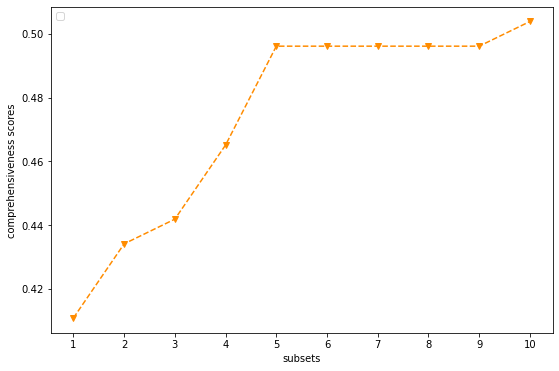

In [7]:
# comprehensive_score
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,6))
y = [score for score in comprehensive_score.values()]
x = [str(i) for i in range(1,11)]
plt.plot(x,y, 'v--', color= 'darkorange' )#, label= query )

plt.xlabel('subsets')
plt.ylabel('comprehensiveness scores')
plt.legend(loc='upper left', ncol = 1) 
# plt.title( 'comprehensive scores over 10 subsets')
plt.show()
fig.savefig(r"C:\Users\huyen\OneDrive\Documents\GitHub\CORD-19-KG\Evaluation\result\KG_eval\comprehensiveness_10folds.png" )

# Correctness and Relatedness

In [1]:
import pandas as pd
import numpy as np
import os


In [ ]:
    #110 =2 -->1
    #001 =1 -->0
    #000 =0 -->0
    #111 =3-->1

## All dimensions (Stage 2)

In [23]:
from collections import defaultdict

paths_accuracy = [r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\stage2\ALL\species_sample_1000_Jesus.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\stage2\ALL\species_sample_1000_apps.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\stage2\ALL\species_sample_1000(madhu).csv"]


def Eval_Accu (paths):
    dic = defaultdict(list)
    for path in paths: 
        with open (path, 'r', encoding = 'utf-8') as file:
            data_accuracy = pd.read_csv(file)
        data_accuracy.columns = [i for i in range(len(data_accuracy.columns))]
    #     del data_accuracy['id']
        for j, k, v in zip ([e for e in range(1000)],data_accuracy[0], data_accuracy[1]):
            dic[k+str(j)].append(int(v))

    df = pd.DataFrame.from_dict(dic, orient='index')
    df1 = df[[0,1,2]]
    #print(df1.head())
    df1['sum'] = df1.sum(axis = 1)
    df1['final_eval'] = np.where(df1['sum']>=2, 1, 0)
    #print(df1['final_eval'])
    #print(df1['final_eval'].value_counts())
    print('percentage of entity accuracy \n', df1['final_eval'].value_counts()*100/1000)
    
Eval_Accu(paths_accuracy)



percentage of entity accuracy 
 1    55.7
0    44.3
Name: final_eval, dtype: float64


In [24]:
root_path = r'C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\stage2\ALL'
filenames = os.listdir(root_path)
i=0
while i<round(len(filenames)/3):
    m=3*i
    n=m+3
    path_group = []
    for files in filenames[m:n]:
        path_group.append(root_path+'\\'+ files)
    print (path_group)
    print(i, '-----------------', Eval_Accu(path_group))
    i+=1

['C:\\Users\\huyen\\OneDrive - UNT System\\PROJECTS\\COVID19_paper\\KG paper\\Evaluation\\stage2\\ALL\\all_ents_sample_1000(madhu).csv', 'C:\\Users\\huyen\\OneDrive - UNT System\\PROJECTS\\COVID19_paper\\KG paper\\Evaluation\\stage2\\ALL\\all_ents_sample_1000_apps.csv', 'C:\\Users\\huyen\\OneDrive - UNT System\\PROJECTS\\COVID19_paper\\KG paper\\Evaluation\\stage2\\ALL\\all_ents_sample_1000_Mudita.csv']
percentage of entity accuracy 
 1    90.2
0     9.8
Name: final_eval, dtype: float64
0 ----------------- None
['C:\\Users\\huyen\\OneDrive - UNT System\\PROJECTS\\COVID19_paper\\KG paper\\Evaluation\\stage2\\ALL\\disease_sample_1000(madhu).csv', 'C:\\Users\\huyen\\OneDrive - UNT System\\PROJECTS\\COVID19_paper\\KG paper\\Evaluation\\stage2\\ALL\\disease_sample_1000_apps.csv', 'C:\\Users\\huyen\\OneDrive - UNT System\\PROJECTS\\COVID19_paper\\KG paper\\Evaluation\\stage2\\ALL\\disease_sample_1000_Zach.csv']
percentage of entity accuracy 
 1    70.5
0    29.5
Name: final_eval, dtype: floa

# Accuracy (only - stage 1)

In [60]:

paths_accuracy = [r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\Accuracy\Entity_accuracy_1.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\Accuracy\Triple_accuracy_1.csv"]

with open (paths_accuracy[1], 'r', encoding = 'utf-8') as file:
    data_trip_accuracy = pd.read_csv(file)
del data_trip_accuracy['id']

data_trip_accuracy['sum'] = data_trip_accuracy.sum(axis = 1)
data_trip_accuracy['final_eval'] = np.where(data_trip_accuracy['sum']>=2, 1, 0)

#110 =2 -->1
#001 =1 -->0
#000 =0 -->0
#111 =3-->1
print('percentage of triple accuracy \n', data_trip_accuracy['final_eval'].value_counts()*100/500)


percentage of triple accuracy 
 1    65.4
0    34.6
Name: final_eval, dtype: float64


## Relatedness

In [77]:
import os
relevance_path = [r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\Relavence\Disease_S1.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\Relavence\Drug_S1.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\Relavence\Gene_S1.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\Relavence\GPE_S1.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\Relavence\ORG_S1.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\Relavence\Species_S1.csv"]

for path in relevance_path:
    with open (path, 'r', encoding = 'utf-8') as file:
        data_relev = pd.read_csv(file)
    del data_relev['id']
    data_relev['sum'] = data_relev.sum(axis = 1)
    data_relev['final_eval'] = np.where(data_relev['sum']>=2, 1, 0)
    print('percentage of entity accuracy_'+ os.path.split(path)[1] + '\n', data_relev['final_eval'].value_counts()*100/500)
    #print(data_relev.tail(5))
    print( '\n----------------------------')

percentage of entity accuracy_Disease_S1.csv
 1    69.6
0    30.4
Name: final_eval, dtype: float64

----------------------------
percentage of entity accuracy_Drug_S1.csv
 1    78.2
0    21.8
Name: final_eval, dtype: float64

----------------------------
percentage of entity accuracy_Gene_S1.csv
 1    51.2
0    48.8
Name: final_eval, dtype: float64

----------------------------
percentage of entity accuracy_GPE_S1.csv
 1    53.0
0    47.0
Name: final_eval, dtype: float64

----------------------------
percentage of entity accuracy_ORG_S1.csv
 0    50.4
1    49.6
Name: final_eval, dtype: float64

----------------------------
percentage of entity accuracy_Species_S1.csv
 1    61.0
0    39.0
Name: final_eval, dtype: float64

----------------------------


### Best annotator

In [6]:
import pandas as pd
import numpy as np
import os

In [4]:
# Accuracy
path = r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\bestS\Entity_accuracy_JBest.csv"

with open (path, 'r', encoding = 'utf-8') as file:
    data_accuracy = pd.read_csv(file)

print('percentage of entity accuracy \n', data_accuracy['evaluation'].value_counts()*100/500)


percentage of entity accuracy 
 1    96.6
0     3.4
Name: evaluation, dtype: float64


In [7]:
# Relevance
paths = [r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\bestS\Entity_relatedness\Disease.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\bestS\Entity_relatedness\Drug.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\bestS\Entity_relatedness\Gene.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\bestS\Entity_relatedness\GPE.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\bestS\Entity_relatedness\ORG.csv",
r"C:\Users\huyen\OneDrive - UNT System\PROJECTS\COVID19_paper\KG paper\Evaluation\Evaluation_Students\bestS\Entity_relatedness\Species.csv"]

for path in paths:
    with open (path, 'r', encoding = 'utf-8') as file:
        data_relev = pd.read_csv(file)
    print('percentage of entity accuracy_'+ os.path.split(path)[1] + '\n', data_relev['evaluation'].value_counts()*100/500)
    print( '\n----------------------------')

percentage of entity accuracy_Disease.csv
 1    91.2
0     8.8
Name: evaluation, dtype: float64

----------------------------
percentage of entity accuracy_Drug.csv
 1    83.0
0    17.0
Name: evaluation, dtype: float64

----------------------------
percentage of entity accuracy_Gene.csv
 0    61.4
1    38.6
Name: evaluation, dtype: float64

----------------------------
percentage of entity accuracy_GPE.csv
 0    88.8
1    11.2
Name: evaluation, dtype: float64

----------------------------
percentage of entity accuracy_ORG.csv
 0    82.6
1    17.4
Name: evaluation, dtype: float64

----------------------------
percentage of entity accuracy_Species.csv
 1    85.4
0    14.6
Name: evaluation, dtype: float64

----------------------------
